In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

#필요한 라이브러리 불러오기


In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

#캐글에서 제공되는 개와 고양이 이미지
#1은 개, 0은 고양이

In [6]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

#train데이터와 val데이터 경로 저장

C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\validation


In [7]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

#경로확인

C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\train\cats
C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\train\dogs
C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\validation\cats
C:\Users\Desk_Kang\.keras\datasets\cats_and_dogs_filtered\validation\dogs


In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

#데이터 갯수 확인

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
# parameter Initialization
batch_size = 10
epochs = 15
IMG_HEIGHT = 256
IMG_WIDTH = 256

#수정하여 성능 높일 수 있음을 확인
#초기 하이퍼파라미터 수치
# batch_size = 16
# epochs = 5
# IMG_HEIGHT = 256
# IMG_WIDTH = 256

In [10]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True, 
                                     shear_range=0.2)

#데이터 수가 적으니 증강을 통해 데이터 수 증가
# base
# image_gen_train = ImageDataGenerator(rescale=1./255,
#                                      rotation_range=0.3,
#                                      width_shift_range=0.1,
#                                      height_shift_range=0.1,
#                                      zoom_range=0.2,
#                                      horizontal_flip=True, 
#                                      vertical_flip=False)

In [12]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
# 파이프라인을 만들어서 쪽쪽 뺴올거임

Found 2000 images belonging to 2 classes.


In [13]:
train_data_gen[0][0].shape
#확인

(10, 256, 256, 3)

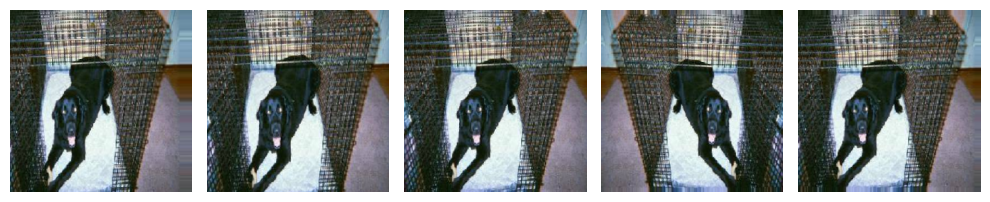

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
#확인2

In [15]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)
#val은 평가용이기 때문에 스케일만 변경

In [16]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


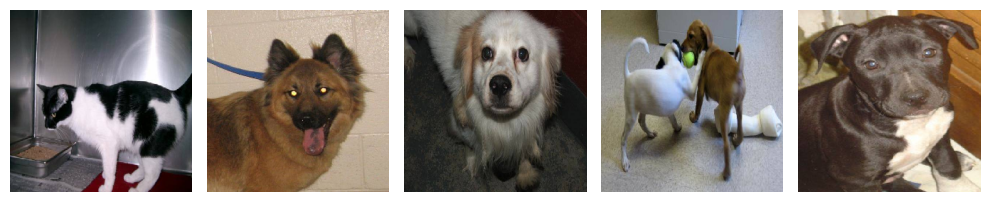

In [17]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

#val 데이터 확인

In [18]:
_[:5] # 정답 데이터

array([0., 1., 1., 1., 1.], dtype=float32)

In [19]:
#VGG16모델 따라가기

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0     

In [20]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback은 차후에 천천히 해봅시다
# 이진 분류 작업에서 모델의 성능 평가할 수 있는 지표 설정

In [21]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

# data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
#batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.
#만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다. 단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.



Epoch 1/15
200/200 [==============================] - 53s 228ms/step - loss: 8.0813 - binary_accuracy: 0.5300 - val_loss: 0.9558 - val_binary_accuracy: 0.5000
Epoch 2/15
200/200 [==============================] - 37s 186ms/step - loss: 0.8118 - binary_accuracy: 0.5215 - val_loss: 1.3708 - val_binary_accuracy: 0.5130
Epoch 3/15
200/200 [==============================] - 38s 189ms/step - loss: 0.7514 - binary_accuracy: 0.4960 - val_loss: 0.7178 - val_binary_accuracy: 0.4950
Epoch 4/15
200/200 [==============================] - 39s 194ms/step - loss: 0.6935 - binary_accuracy: 0.4865 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/15
200/200 [==============================] - 37s 183ms/step - loss: 0.7088 - binary_accuracy: 0.4860 - val_loss: 0.6926 - val_binary_accuracy: 0.4990
Epoch 6/15
200/200 [==============================] - 36s 180ms/step - loss: 0.7289 - binary_accuracy: 0.5400 - val_loss: 0.8814 - val_binary_accuracy: 0.5160
Epoch 7/15
200/200 [==========================

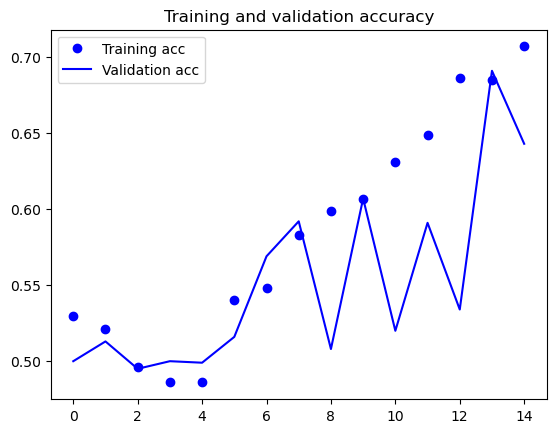

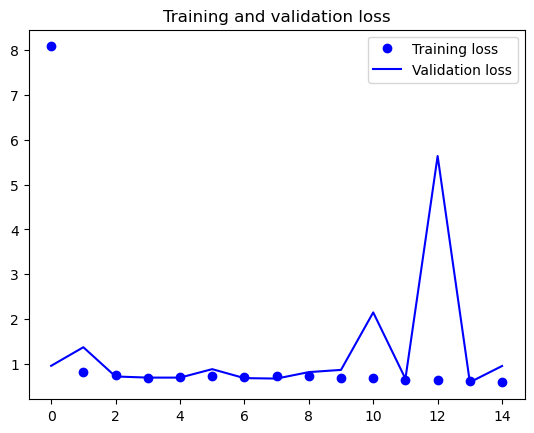

In [22]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# 다르다....?
# 또 다르다.....?